**Capstone Project Submission**

* Student Name: Wes Swager
* Student Pace: Full Time
* Instructor Name: Claude Fried
* Scheduled Project Review Date/Time
    * Friday, June 11, 2021, 2:30pm CST
    * Monday, June 13, 2021, 2:30pm CST

# **Expected Goals Classifier**

# Overview

Create an expected goals classification model using existing historical match data for use with future match analysis and actionable recommendations which can be utilized in training to help improve goal-scoring.

Project detailed on Github: [milwaukee_fc](https://github.com/wswager/milwaukee_fc)

# Modeling Notebook

*Notebook 7 of 8*

### Index

1. Data extracted in [expected_goals_data_extraction_notebook]()
2. Data organized in [expected_goals_data_organization_notebook]()
3. Features engineered in [expected_goals_feature_engineering_notebook]()
4. Data cleaned in [expected_goals_data_cleaning_notebook]()
5. Data explored in [expected_goals_data_exploration_notebook]()
6. Data preprocessed in [expected_goals_data_preprocessing_notebook]()
7. Model fitting and refinement in [expected_goals_model_fitting_notebook]()
8. Conclusions in [expected_goals_model_assessment_notebook]()

### Data

Data sourced from [StatsBomb](https://statsbomb.com/), a United Kingdom based football (soccer) data analytics company.

StatsBomb have provided free access to their proprietary dataset via GitHub: [StatsBomb Open Data](https://github.com/statsbomb/open-data)

In [191]:
# Import dataframes extracted from
# expected_goals_data_cleaning_notebook

X_train = pd.read_csv('/content/drive/MyDrive/flatiron/expected_goals/data_preprocessing/X_train.csv')
X_test = pd.read_csv('/content/drive/MyDrive/flatiron/expected_goals/data_preprocessing/X_test.csv')

y_train = pd.read_csv('/content/drive/MyDrive/flatiron/expected_goals/data_preprocessing/y_train.csv')
y_test = pd.read_csv('/content/drive/MyDrive/flatiron/expected_goals/data_preprocessing/y_test.csv')

In [192]:
X_train = X_train.iloc[: , 1:]
X_test = X_test.iloc[: , 1:]
y_train = y_train.iloc[: , 1:]
y_test = y_test.iloc[: , 1:]

<a id = 'packages'></a>
# Packages

In [229]:
# Drive  and IO to access saved data
from google.colab import drive, files
drive.mount('/content/drive')

import io

# Pandas for Dataframes
import pandas as pd

# Numpy and for mathematical functions
import numpy as np

# Imblearn for oversampling
import imblearn
from imblearn.over_sampling import SMOTE

# Scikit-learn and XGBoost for modeling

import sklearn
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, BaggingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, recall_score, precision_score, roc_auc_score, roc_curve, f1_score, classification_report, confusion_matrix
from sklearn.feature_selection import RFE
from sklearn.ensemble import VotingClassifier

import xgboost as xgb

# Matplotlib and Seaborn for visualizations

import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.colors import ListedColormap

import seaborn as sns
sns.set(style = 'darkgrid', context = 'talk')

# Pickle to save models

import pickle

import warnings
warnings.filterwarnings('ignore')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Class Imbalance

In [181]:
# Use Synthetic Minority Oversampling Technique to address class imbalance

# Because the priority is identifying true-positives, and true-positives are
# the minority class, SMOTE oversamples true-positives, generating synthetic
# samples to help avoid overfitting during the modeling process by balancing
# the classes

sm = SMOTE(random_state = 13)

In [193]:
oversample_X_train, oversample_y_train = sm.fit_resample(X_train, y_train)

In [195]:
X_train_os = pd.DataFrame(oversample_X_train,
                          columns = X_train.columns)
y_train_os = pd.DataFrame(oversample_y_train,
                          columns = y_train.columns)

In [394]:
X_train_os.to_csv('/content/drive/MyDrive/flatiron/expected_goals/data_modeling/X_train_os.csv')
y_train_os.to_csv('/content/drive/MyDrive/flatiron/expected_goals/data_modeling/y_train_os.csv')

## Functions

In [127]:
# Use Grid Search to find the best parameters for model

def model_grid(model, params):
    grid = GridSearchCV(model,
                        params,
                        refit = True,
                        cv = 5)
    
    grid.fit(X_train_os, y_train_os)

    grid_best = grid.best_params_

    display(grid_best)

In [10]:
# Generate model report

def model_report(train,
                 train_prediction):
  report = pd.DataFrame(classification_report(train,
                                              train_prediction,
                                              output_dict = True))
  display(report)

In [11]:
 # Calculate model ROC AUC

 # Visualize ROC Curve

def model_roc(train,
              test,
              train_probability,
              test_probability):
  print('Train - Area Under the Curve:',
        round(roc_auc_score(train,
                            train_probability[:,1]),2))
  print('Test - Area Under the Curve:',
        round(roc_auc_score(test,
                            test_probability[:,1]),2))
  
  fpr_train, tpr_train, thresholds_train = roc_curve(train, 
                                                     train_probability[:,1])
  fpr_test, tpr_test, thresholds_test = roc_curve(test, 
                                                     test_probability[:,1])
    
  f, ax = plt.subplots(figsize = (10, 10))
  
  plt.plot(fpr_train,
           tpr_train,
           'aqua',
           label = 'Train')
  
  plt.plot(fpr_test,
           tpr_test,
           'lightcoral',
           label = 'Test')
  
  plt.plot([0, 1],
           [0, 1],
           'purple')
  
  ax.set_title('Receiver Operating Characteristic')
  ax.set_xlabel('False Positive Rate')
  ax.set_ylabel('True Positive Rate')
  ax.legend(bbox_to_anchor = (1.05, 1),
            loc = 2,
            borderaxespad = 0);

# Models

## Logistic Regression

In [12]:
# Define Model

lr = LogisticRegression(random_state = 13,
                        class_weight = 'balanced')

### Define Parameters

In [13]:
# Define lr parameters for Grid Search

lr_params = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
             'solver': ['newton-cg', 'lbfgs', 'sag', 'saga']}

model_grid(lr, lr_params)

{'C': 10, 'solver': 'sag'}

In [14]:
# Define best paramters for lr

lr_best = LogisticRegression(random_state = 13,
                             C = 10,
                             class_weight = 'balanced',
                             solver = 'sag')

### Fit Model

In [15]:
lr_best.fit(X_train_os,
            y_train_os)

LogisticRegression(C=10, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=13, solver='sag', tol=0.0001, verbose=0,
                   warm_start=False)

In [16]:
lr_train_predict = lr_best.predict(X_train_os)
lr_train_probability = lr_best.predict_proba(X_train_os)

lr_test_predict = lr_best.predict(X_test)
lr_test_probability = lr_best.predict_proba(X_test)

### Results

In [17]:
print('Train Report')
model_report(y_train_os,
             lr_train_predict)

print('Test Report')
model_report(y_test,
             lr_test_predict)

Train Report


,0,1,accuracy,macro avg,weighted avg
precision,0.724666,0.695316,0.708966,0.709991,0.709991
recall,0.674023,0.743908,0.708966,0.708966,0.708966
f1-score,0.698428,0.718792,0.708966,0.708610,0.708610
support,4350.000000,4350.000000,0.708966,8700.000000,8700.000000


Test Report


,0,1,accuracy,macro avg,weighted avg
precision,0.936085,0.180851,0.645373,0.558468,0.853820
recall,0.646140,0.639098,0.645373,0.642619,0.645373
f1-score,0.764546,0.281924,0.645373,0.523235,0.711975
support,1088.000000,133.000000,0.645373,1221.000000,1221.000000


Train - Area Under the Curve: 0.77
Test - Area Under the Curve: 0.71


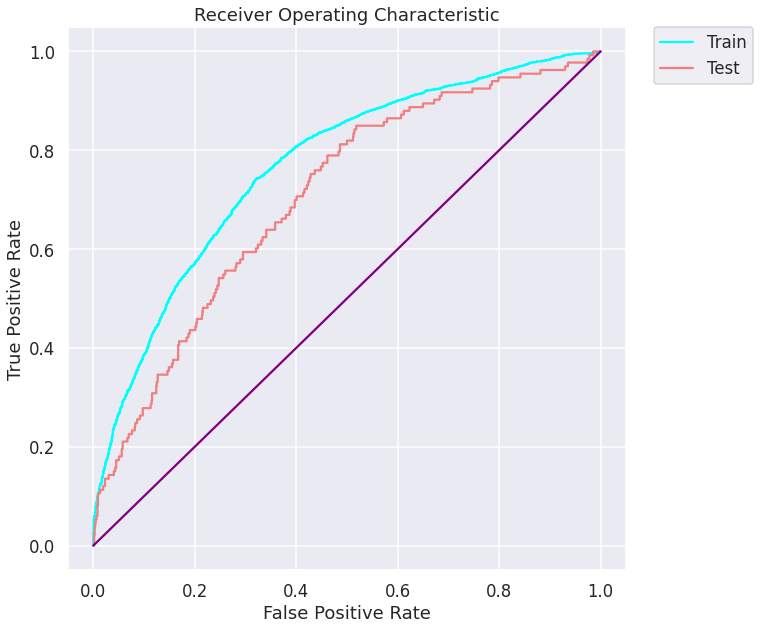

In [18]:
model_roc(y_train_os,
          y_test,
          lr_train_probability,
          lr_test_probability)

In [382]:
pickle.dump(lr_best, open('/content/drive/MyDrive/flatiron/expected_goals/data_modeling/lr.pkl',
                          'wb'))

## K Neighbors

In [19]:
#Define model

kn = KNeighborsClassifier()

### Define Parameters

In [20]:
# Define kn parameters for Grid Search

kn_params = {'metric': ['euclidean', 'manhattan'],
             'leaf_size' : [1, 10, 20, 30, 40, 50],
             'weights' : ['uniform', 'distance'],
             'n_neighbors' : [1, 10, 20, 30],
             'p' : [1, 2]}

# Use Grid Search to find the best parameters for kn

model_grid(kn, kn_params)

{'leaf_size': 1,
 'metric': 'manhattan',
 'n_neighbors': 1,
 'p': 1,
 'weights': 'uniform'}

In [21]:
# Refine kn parameters for Grid Search

kn_best = KNeighborsClassifier(metric = 'manhattan',
                               p = 1,
                               weights = 'uniform')

kn_params = {'leaf_size' : [1, 5],
             'n_neighbors' : [1, 5]}

model_grid(kn_best, kn_params)

{'leaf_size': 1, 'n_neighbors': 1}

In [22]:
# Define best paramters for kn

kn_best = KNeighborsClassifier(metric = 'manhattan',
                               leaf_size = 1,
                               p = 1,
                               weights = 'uniform',
                               n_neighbors = 1)

### Fit Model

In [23]:
kn_best.fit(X_train_os,
            y_train_os)

KNeighborsClassifier(algorithm='auto', leaf_size=1, metric='manhattan',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=1,
                     weights='uniform')

In [24]:
kn_train_predict = kn_best.predict(X_train_os)
kn_train_probability = kn_best.predict_proba(X_train_os)

kn_test_predict = kn_best.predict(X_test)
kn_test_probability = kn_best.predict_proba(X_test)

### Results

In [25]:
print('Train Report')
model_report(y_train_os,
             kn_train_predict)

print('Test Report')
model_report(y_test,
             kn_test_predict)

Train Report


,0,1,accuracy,macro avg,weighted avg
precision,0.99977,0.999311,0.99954,0.99954,0.99954
recall,0.99931,0.999770,0.99954,0.99954,0.99954
f1-score,0.99954,0.999540,0.99954,0.99954,0.99954
support,4350.00000,4350.000000,0.99954,8700.00000,8700.00000


Test Report


,0,1,accuracy,macro avg,weighted avg
precision,0.906832,0.168627,0.752662,0.537730,0.826422
recall,0.805147,0.323308,0.752662,0.564228,0.752662
f1-score,0.852970,0.221649,0.752662,0.537310,0.784202
support,1088.000000,133.000000,0.752662,1221.000000,1221.000000


### Adjustments

In [26]:
# Due to signs of overfitting, manually tune parameters

kn_best = KNeighborsClassifier(metric = 'manhattan',
                               leaf_size = 1,
                               p = 1,
                               weights = 'uniform',
                               n_neighbors = 300)

### Refit Model

In [27]:
kn_best.fit(X_train_os,
            y_train_os)

KNeighborsClassifier(algorithm='auto', leaf_size=1, metric='manhattan',
                     metric_params=None, n_jobs=None, n_neighbors=300, p=1,
                     weights='uniform')

In [28]:
kn_train_predict = kn_best.predict(X_train_os)
kn_train_probability = kn_best.predict_proba(X_train_os)

kn_test_predict = kn_best.predict(X_test)
kn_test_probability = kn_best.predict_proba(X_test)

### Results

In [29]:
print('Train Report')
model_report(y_train_os,
             kn_train_predict)

print('Test Report')
model_report(y_test,
             kn_test_predict)

Train Report


,0,1,accuracy,macro avg,weighted avg
precision,0.754177,0.659312,0.695862,0.706744,0.706744
recall,0.581149,0.810575,0.695862,0.695862,0.695862
f1-score,0.656453,0.727160,0.695862,0.691807,0.691807
support,4350.000000,4350.000000,0.695862,8700.000000,8700.000000


Test Report


,0,1,accuracy,macro avg,weighted avg
precision,0.945455,0.172906,0.5905,0.559180,0.861303
recall,0.573529,0.729323,0.5905,0.651426,0.590500
f1-score,0.713959,0.279539,0.5905,0.496749,0.666639
support,1088.000000,133.000000,0.5905,1221.000000,1221.000000


Train - Area Under the Curve: 0.77
Test - Area Under the Curve: 0.7


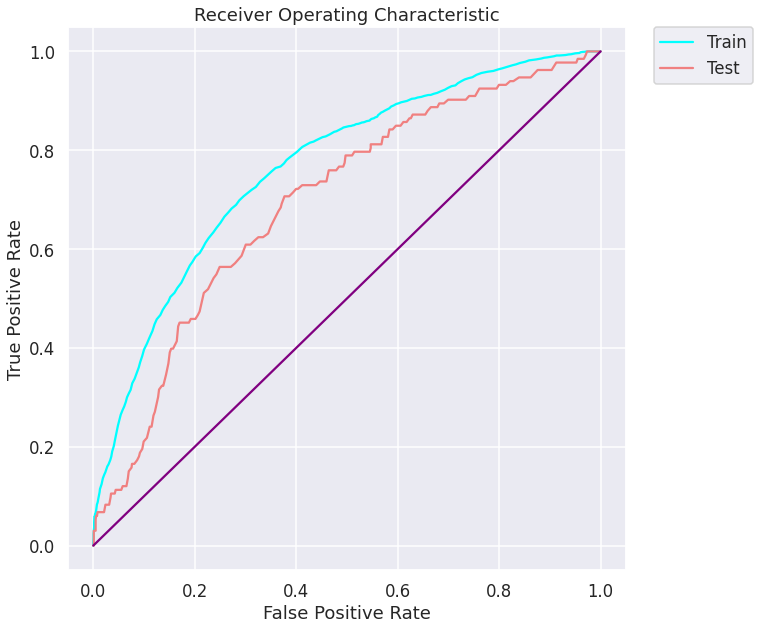

In [30]:
model_roc(y_train_os,
          y_test,
          kn_train_probability,
          kn_test_probability)

In [383]:
pickle.dump(kn_best, open('/content/drive/MyDrive/flatiron/expected_goals/data_modeling/kn.pkl',
                          'wb'))

## Decision Tree

In [31]:
# Define model

dt = DecisionTreeClassifier(random_state = 13,
                            class_weight = 'balanced')

### Define Parameters

In [32]:
# Define dt parameters for Grid Search

dt_params = {'criterion' : ['gini', 'entropy'],
            'max_depth' : [1, 5, 10],
            'min_samples_split' : [1, 5, 10],
            'min_samples_leaf' : [1, 5]}

# Use Grid Search to find the best parameters for dt

model_grid(dt, dt_params)

{'criterion': 'gini',
 'max_depth': 10,
 'min_samples_leaf': 1,
 'min_samples_split': 5}

In [33]:
# Refine dt parameters for Grid Search

dt_best = DecisionTreeClassifier(criterion = 'gini',
                                 class_weight = 'balanced',
                                 random_state = 13,
                                 min_samples_split = 5,
                                 min_samples_leaf = 1

dt_params = {'max_depth' : [10, 20, 50, 100]}

# Use Grid Search to find the best parameters for dt

model_grid(dt, dt_params)

{'max_depth': 50}

In [34]:
# Define best paramters for dt

dt_best = DecisionTreeClassifier(criterion = 'gini',
                                 class_weight = 'balanced',
                                 random_state = 13,
                                 max_depth = 50,
                                 min_samples_split = 5,
                                 min_samples_leaf = 1)

### Fit Model

In [35]:
dt_best.fit(X_train_os,
            y_train_os)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight='balanced', criterion='gini',
                       max_depth=50, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=13, splitter='best')

In [36]:
dt_train_predict = dt_best.predict(X_train_os)
dt_train_probability = dt_best.predict_proba(X_train_os)

dt_test_predict = dt_best.predict(X_test)
dt_test_probability = dt_best.predict_proba(X_test)

### Results

In [37]:
print('Train Report')
model_report(y_train_os,
             dt_train_predict)

print('Test Report')
model_report(y_test,
             dt_test_predict)

Train Report


,0,1,accuracy,macro avg,weighted avg
precision,0.966396,0.984763,0.975402,0.975580,0.975580
recall,0.985057,0.965747,0.975402,0.975402,0.975402
f1-score,0.975638,0.975162,0.975402,0.975400,0.975400
support,4350.000000,4350.000000,0.975402,8700.000000,8700.000000


Test Report


,0,1,accuracy,macro avg,weighted avg
precision,0.895812,0.128099,0.743653,0.511956,0.812187
recall,0.806066,0.233083,0.743653,0.519574,0.743653
f1-score,0.848573,0.165333,0.743653,0.506953,0.774150
support,1088.000000,133.000000,0.743653,1221.000000,1221.000000


### Adjustments

In [50]:
# Due to signs of overfitting, manually tune parameters

dt_best = DecisionTreeClassifier(criterion = 'gini',
                                 class_weight = 'balanced',
                                 random_state = 13,
                                 max_depth = 5,
                                 min_samples_split = 10,
                                 min_samples_leaf = 5)

### Refit Model

In [51]:
dt_best.fit(X_train_os,
            y_train_os)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight='balanced', criterion='gini',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=13, splitter='best')

In [52]:
dt_train_predict = dt_best.predict(X_train_os)
dt_train_probability = dt_best.predict_proba(X_train_os)

dt_test_predict = dt_best.predict(X_test)
dt_test_probability = dt_best.predict_proba(X_test)

### Results

In [53]:
print('Train Report')
model_report(y_train_os,
             dt_train_predict)

print('Test Report')
model_report(y_test,
             dt_test_predict)

Train Report


,0,1,accuracy,macro avg,weighted avg
precision,0.757992,0.698678,0.724483,0.728335,0.728335
recall,0.659540,0.789425,0.724483,0.724483,0.724483
f1-score,0.705347,0.741284,0.724483,0.723316,0.723316
support,4350.000000,4350.000000,0.724483,8700.000000,8700.000000


Test Report


,0,1,accuracy,macro avg,weighted avg
precision,0.939891,0.182004,0.636364,0.560947,0.857336
recall,0.632353,0.669173,0.636364,0.650763,0.636364
f1-score,0.756044,0.286174,0.636364,0.521109,0.704862
support,1088.000000,133.000000,0.636364,1221.000000,1221.000000


Train - Area Under the Curve: 0.78
Test - Area Under the Curve: 0.69


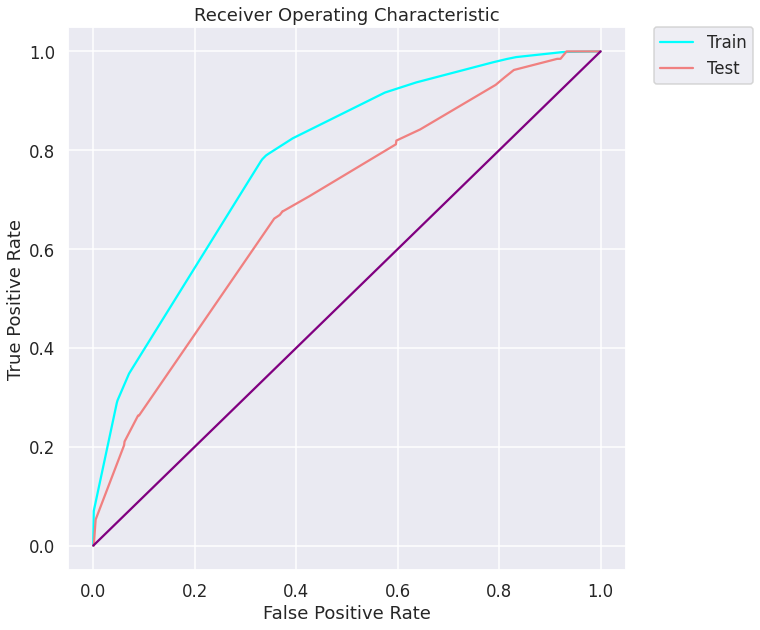

In [54]:
model_roc(y_train_os,
          y_test,
          dt_train_probability,
          dt_test_probability)

In [398]:
pickle.dump(dt_best, open('/content/drive/MyDrive/flatiron/expected_goals/data_modeling/dt.pkl',
                          'wb'))

## Random Forest

In [55]:
# Define model

rf = RandomForestClassifier(random_state = 13,
                            class_weight = 'balanced')

### Define Parameters

In [56]:
# Define rf parameters for Grid Search

rf_params = {'n_estimators' : [100, 150, 200],
             'criterion' : ['gini', 'entropy'],
             'max_depth' : [10, 50, 100],
             'min_samples_split' : [2, 5, 10],
             'min_samples_leaf' : [1, 5]}

# Use Grid Search to find the best parameters for rf

model_grid(rf, rf_params)

{'criterion': 'gini',
 'max_depth': 50,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 200}

In [59]:
# Refine rf parameters for Grid Search

rf_best = RandomForestClassifier(criterion = 'gini',
                                 min_samples_leaf = 1,
                                 min_samples_split = 2,
                                 max_depth = 50,
                                 random_state = 13,
                                 class_weight = 'balanced')

rf_params = {'n_estimators' : [175, 200, 250, 300]}

# Use Grid Search to find the best parameters for rf

model_grid(rf, rf_params)

{'n_estimators': 200}

In [60]:
# Define best paramters for rf

rf_best = RandomForestClassifier(n_estimators = 200,
                                 criterion = 'gini',
                                 min_samples_leaf = 1,
                                 min_samples_split = 2,
                                 max_depth = 50,
                                 random_state = 13,
                                 class_weight = 'balanced')

### Fit Model

In [61]:
rf_best.fit(X_train_os,
            y_train_os)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [62]:
rf_train_predict = rf_best.predict(X_train_os)
rf_train_probability = rf_best.predict_proba(X_train_os)

rf_test_predict = rf_best.predict(X_test)
rf_test_probability = rf_best.predict_proba(X_test)

### Results

In [63]:
print('Train Report')
model_report(y_train_os,
             rf_train_predict)

print('Test Report')
model_report(y_test,
             rf_test_predict)

Train Report


,0,1,accuracy,macro avg,weighted avg
precision,1.00000,0.999081,0.99954,0.999541,0.999541
recall,0.99908,1.000000,0.99954,0.999540,0.999540
f1-score,0.99954,0.999540,0.99954,0.999540,0.999540
support,4350.00000,4350.000000,0.99954,8700.000000,8700.000000


Test Report


,0,1,accuracy,macro avg,weighted avg
precision,0.906067,0.185930,0.788698,0.545998,0.827624
recall,0.851103,0.278195,0.788698,0.564649,0.788698
f1-score,0.877725,0.222892,0.788698,0.550308,0.806396
support,1088.000000,133.000000,0.788698,1221.000000,1221.000000


### Adjustments

In [105]:
# Due to signs of overfitting, manually tune parameters

rf_best = RandomForestClassifier(n_estimators = 300,
                                 criterion = 'gini',
                                 min_samples_leaf = 5,
                                 min_samples_split = 2,
                                 max_depth = 3,
                                 random_state = 13,
                                 class_weight = 'balanced')

### Refit Model

In [106]:
rf_best.fit(X_train_os,
            y_train_os)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight='balanced',
                       criterion='gini', max_depth=3, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=300,
                       n_jobs=None, oob_score=False, random_state=13, verbose=0,
                       warm_start=False)

In [107]:
rf_train_predict = rf_best.predict(X_train_os)
rf_train_probability = rf_best.predict_proba(X_train_os)

rf_test_predict = rf_best.predict(X_test)
rf_test_probability = rf_best.predict_proba(X_test)

### Results

In [108]:
print('Train Report')
model_report(y_train_os,
             rf_train_predict)

print('Test Report')
model_report(y_test,
             rf_test_predict)

Train Report


,0,1,accuracy,macro avg,weighted avg
precision,0.750294,0.660256,0.695402,0.705275,0.705275
recall,0.585747,0.805057,0.695402,0.695402,0.695402
f1-score,0.657888,0.725502,0.695402,0.691695,0.691695
support,4350.000000,4350.000000,0.695402,8700.000000,8700.000000


Test Report


,0,1,accuracy,macro avg,weighted avg
precision,0.944359,0.168990,0.579853,0.556674,0.859900
recall,0.561581,0.729323,0.579853,0.645452,0.579853
f1-score,0.704323,0.274399,0.579853,0.489361,0.657492
support,1088.000000,133.000000,0.579853,1221.000000,1221.000000


Train - Area Under the Curve: 0.8
Test - Area Under the Curve: 0.7


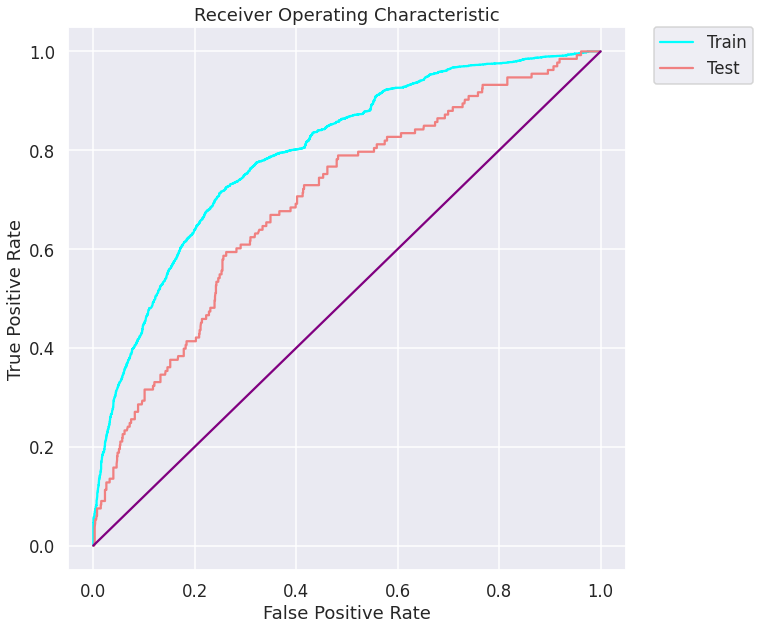

In [109]:
model_roc(y_train_os,
          y_test,
          rf_train_probability,
          rf_test_probability)

In [397]:
pickle.dump(rf_best, open('/content/drive/MyDrive/flatiron/expected_goals/data_modeling/rf.pkl',
                          'wb'))

## Gaussian Naive Bayes

In [110]:
from sklearn.naive_bayes import GaussianNB

In [111]:
# Define Model

gnb = GaussianNB()

### Fit Model

In [112]:
gnb.fit(X_train_os,
        y_train_os)

GaussianNB(priors=None, var_smoothing=1e-09)

In [113]:
gnb_train_predict = gnb.predict(X_train_os)
gnb_train_probability = gnb.predict_proba(X_train_os)

gnb_test_predict = gnb.predict(X_test)
gnb_test_probability = gnb.predict_proba(X_test)

### Results

In [114]:
print('Train Report')
model_report(y_train_os,
             gnb_train_predict)

print('Test Report')
model_report(y_test,
             gnb_test_predict)

Train Report


,0,1,accuracy,macro avg,weighted avg
precision,0.603208,0.743342,0.644943,0.673275,0.673275
recall,0.847126,0.442759,0.644943,0.644943,0.644943
f1-score,0.704656,0.554963,0.644943,0.629810,0.629810
support,4350.000000,4350.000000,0.644943,8700.000000,8700.000000


Test Report


,0,1,accuracy,macro avg,weighted avg
precision,0.913530,0.201681,0.774775,0.557605,0.835990
recall,0.825368,0.360902,0.774775,0.593135,0.774775
f1-score,0.867214,0.258760,0.774775,0.562987,0.800937
support,1088.000000,133.000000,0.774775,1221.000000,1221.000000


Train - Area Under the Curve: 0.73
Test - Area Under the Curve: 0.66


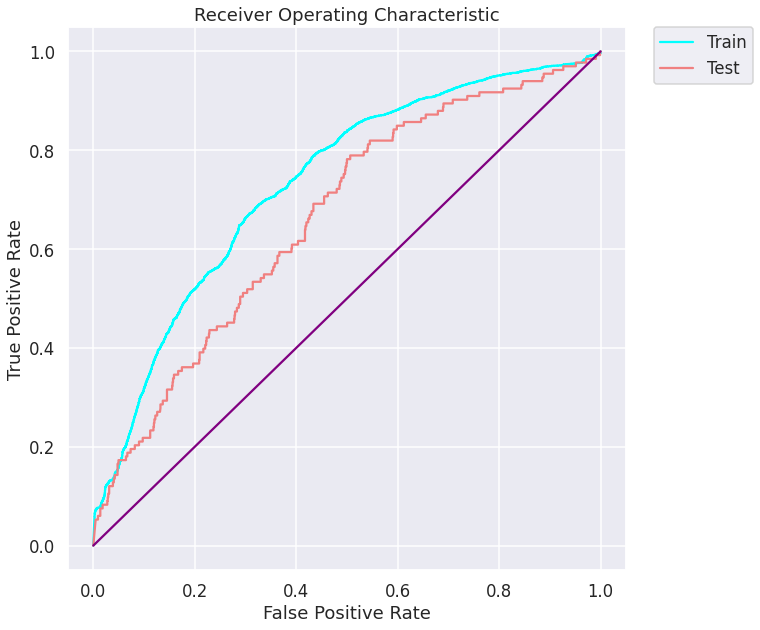

In [115]:
model_roc(y_train_os,
          y_test,
          gnb_train_probability,
          gnb_test_probability)

In [386]:
pickle.dump(gnb, open('/content/drive/MyDrive/flatiron/expected_goals/data_modeling/gnb.pkl',
                          'wb'))

## Support Vector Machine

In [116]:
# Define model

svc = SVC(random_state = 13,
          probability = True,
          class_weight = 'balanced')

### Define Parameters

In [117]:
# Define dt parameters for Grid Search

svc_params = {'C' : [0.001, 0.01, 0.1, 1, 10, 100],
              'kernel' : 'linear', 'poly', 'rbf'}

# Use Grid Search to find the best parameters for dt

model_grid(svc, svc_params)

{'C': 100}

In [128]:
# Define best paramters for kn

svc_best = SVC(C = 100,
               kernel = 'rbf',
               random_state = 13,
               probability = True,
               class_weight = 'balanced')

### Fit Model

In [129]:
svc_best.fit(X_train_os,
             y_train_os)

SVC(C=100, break_ties=False, cache_size=200, class_weight='balanced', coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=True, random_state=13, shrinking=True, tol=0.001,
    verbose=False)

In [130]:
svc_train_predict = svc_best.predict(X_train_os)
svc_train_probability = svc_best.predict_proba(X_train_os)

svc_test_predict = svc_best.predict(X_test)
svc_test_probability = svc_best.predict_proba(X_test)

### Results

In [131]:
print('Train Report')
model_report(y_train_os,
             svc_train_predict)

print('Test Report')
model_report(y_test,
             svc_test_predict)

Train Report


,0,1,accuracy,macro avg,weighted avg
precision,0.877498,0.800083,0.834368,0.838790,0.838790
recall,0.777241,0.891494,0.834368,0.834368,0.834368
f1-score,0.824333,0.843318,0.834368,0.833826,0.833826
support,4350.000000,4350.000000,0.834368,8700.000000,8700.000000


Test Report


,0,1,accuracy,macro avg,weighted avg
precision,0.923523,0.187151,0.707617,0.555337,0.843312
recall,0.732537,0.503759,0.707617,0.618148,0.707617
f1-score,0.817017,0.272912,0.707617,0.544965,0.757749
support,1088.000000,133.000000,0.707617,1221.000000,1221.000000


### Adjustments

In [141]:
# Due to signs of overfitting, manually tune parameters

svc_best = SVC(C = 1,
               gamma = 'auto',
               kernel = 'rbf',
               class_weight = 'balanced',
               random_state = 13,
               probability = True)

### Refit Model

In [142]:
svc_best.fit(X_train_os,
             y_train_os)

SVC(C=1, break_ties=False, cache_size=200, class_weight='balanced', coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
    max_iter=-1, probability=True, random_state=13, shrinking=True, tol=0.001,
    verbose=False)

In [143]:
svc_train_predict = svc_best.predict(X_train_os)
svc_train_probability = svc_best.predict_proba(X_train_os)

svc_test_predict = svc_best.predict(X_test)
svc_test_probability = svc_best.predict_proba(X_test)

### Results

In [144]:
print('Train Report')
model_report(y_train_os,
             svc_train_predict)

print('Test Report')
model_report(y_test,
             svc_test_predict)

Train Report


,0,1,accuracy,macro avg,weighted avg
precision,0.738972,0.715566,0.726667,0.727269,0.727269
recall,0.700920,0.752414,0.726667,0.726667,0.726667
f1-score,0.719443,0.733528,0.726667,0.726485,0.726485
support,4350.000000,4350.000000,0.726667,8700.000000,8700.000000


Test Report


,0,1,accuracy,macro avg,weighted avg
precision,0.940798,0.195946,0.669943,0.568372,0.859663
recall,0.671875,0.654135,0.669943,0.663005,0.669943
f1-score,0.783914,0.301560,0.669943,0.542737,0.731373
support,1088.000000,133.000000,0.669943,1221.000000,1221.000000


Train - Area Under the Curve: 0.79
Test - Area Under the Curve: 0.69


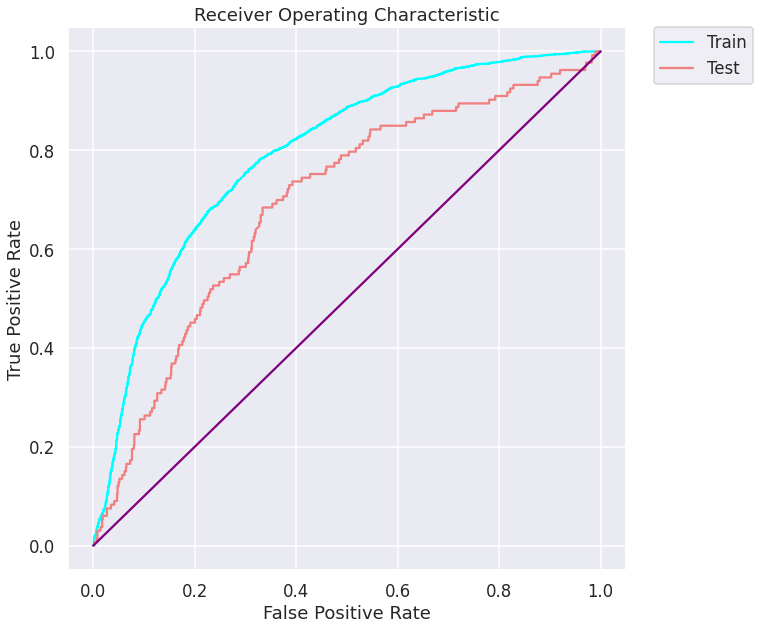

In [145]:
model_roc(y_train_os,
          y_test,
          svc_train_probability,
          svc_test_probability)

In [387]:
pickle.dump(svc_best, open('/content/drive/MyDrive/flatiron/expected_goals/data_modeling/svc.pkl',
                          'wb'))

## Gradient Boost

In [146]:
# Define model

gb = GradientBoostingClassifier(random_state = 13)

### Define Parameters

In [147]:
# Use Grid Search to find the best parameters for gb

gb_params = {'n_estimators' : [50, 100, 150],
             'learning_rate' : [0.01, 0.1, 1]}

model_grid(gb, gb_params)

{'learning_rate': 1, 'n_estimators': 100}

In [148]:
# Define best paramters for gb

gb_best = GradientBoostingClassifier(random_state = 13,
                                     n_estimators = 100,
                                     learning_rate = 1)

### Fit Model

In [149]:
gb_best.fit(X_train_os,
            y_train_os)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=13, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [150]:
gb_train_predict = gb_best.predict(X_train_os)
gb_train_probability = gb_best.predict_proba(X_train_os)

gb_test_predict = gb_best.predict(X_test)
gb_test_probability = gb_best.predict_proba(X_test)

### Results

In [151]:
print('Train Report')
model_report(y_train_os,
             gb_train_predict)

print('Test Report')
model_report(y_test,
             gb_test_predict)

Train Report


,0,1,accuracy,macro avg,weighted avg
precision,0.925967,0.967454,0.945747,0.946710,0.946710
recall,0.968966,0.922529,0.945747,0.945747,0.945747
f1-score,0.946978,0.944458,0.945747,0.945718,0.945718
support,4350.000000,4350.000000,0.945747,8700.000000,8700.000000


Test Report


,0,1,accuracy,macro avg,weighted avg
precision,0.906956,0.263158,0.846847,0.585057,0.836829
recall,0.922794,0.225564,0.846847,0.574179,0.846847
f1-score,0.914806,0.242915,0.846847,0.578861,0.841619
support,1088.000000,133.000000,0.846847,1221.000000,1221.000000


### Adjustments

In [153]:
# Due to signs of overfitting, manually tune parameters

gb_best = GradientBoostingClassifier(random_state = 13,
                                     n_estimators = 100,
                                     learning_rate = 0.01)

### Refit Model

In [154]:
gb_best.fit(X_train_os,
            y_train_os)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.01, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=13, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [155]:
gb_train_predict = gb_best.predict(X_train_os)
gb_train_probability = gb_best.predict_proba(X_train_os)

gb_test_predict = gb_best.predict(X_test)
gb_test_probability = gb_best.predict_proba(X_test)

### Results

In [156]:
print('Train Report')
model_report(y_train_os,
             gb_train_predict)

print('Test Report')
model_report(y_test,
             gb_test_predict)

Train Report


,0,1,accuracy,macro avg,weighted avg
precision,0.755342,0.692897,0.71977,0.724120,0.724120
recall,0.650115,0.789425,0.71977,0.719770,0.719770
f1-score,0.698789,0.738018,0.71977,0.718404,0.718404
support,4350.000000,4350.000000,0.71977,8700.000000,8700.000000


Test Report


,0,1,accuracy,macro avg,weighted avg
precision,0.942228,0.184211,0.635545,0.563219,0.859660
recall,0.629596,0.684211,0.635545,0.656903,0.635545
f1-score,0.754821,0.290271,0.635545,0.522546,0.704219
support,1088.000000,133.000000,0.635545,1221.000000,1221.000000


Train - Area Under the Curve: 0.79
Test - Area Under the Curve: 0.7


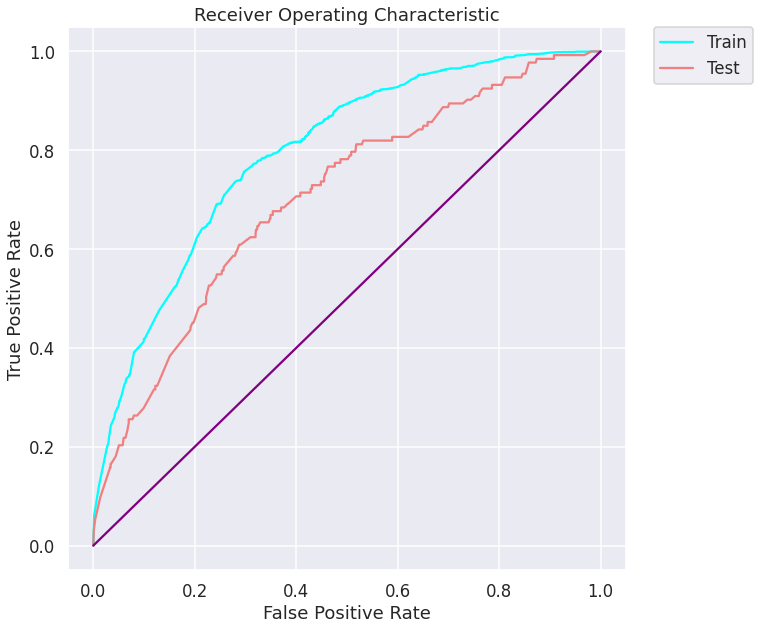

In [157]:
model_roc(y_train_os,
          y_test,
          gb_train_probability,
          gb_test_probability)

In [388]:
pickle.dump(gb_best, open('/content/drive/MyDrive/flatiron/expected_goals/data_modeling/gb.pkl',
                          'wb'))

## XG Boost

In [158]:
# Define model

xgb1 = xgb.XGBClassifier()

### Define Parameters

In [159]:
# Define xgb parameters for Grid Search
# Use Grid Search to find the best parameters for xgb

xgb_params = {'eta' : [0.05, 0.1, 0.15],
             'max_depth' : [5, 10, 15],
             'subsample' : [0.5, 1],
             'objective' : ['binary:logistic', 'binary:logitraw', 'binary:hinge']}

model_grid(xgb1, xgb_params)

{'eta': 0.05, 'max_depth': 15, 'objective': 'binary:logistic', 'subsample': 1}

In [160]:
# Define best paramters for xgb

xgb_best = xgb.XGBClassifier(eta = 0.05,
                             max_depth = 15,
                             objective = 'binary:logistic',
                             subsample = 1)

### Fit Model

In [201]:
xgb_best.fit(X_train_os,
             y_train_os)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, eta=0.01, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=2,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logitraw', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=0.5, verbosity=1)

In [202]:
xgb_train_predict = xgb_best.predict(X_train_os)
xgb_train_probability = xgb_best.predict_proba(X_train_os)

xgb_test_predict = xgb_best.predict(X_test)
xgb_test_probability = xgb_best.predict_proba(X_test)

### Results

In [203]:
print('Train Report')
model_report(y_train_os,
             xgb_train_predict)

print('Test Report')
model_report(y_test,
             xgb_test_predict)

Train Report


,0,1,accuracy,macro avg,weighted avg
precision,0.689681,0.812976,0.736207,0.751328,0.751328
recall,0.858851,0.613563,0.736207,0.736207,0.736207
f1-score,0.765025,0.699332,0.736207,0.732178,0.732178
support,4350.000000,4350.000000,0.736207,8700.000000,8700.000000


Test Report


,0,1,accuracy,macro avg,weighted avg
precision,0.923547,0.241667,0.789517,0.582607,0.849272
recall,0.832721,0.436090,0.789517,0.634405,0.789517
f1-score,0.875785,0.310992,0.789517,0.593389,0.814264
support,1088.000000,133.000000,0.789517,1221.000000,1221.000000


### Adjustments

In [208]:
# Due to signs of overfitting, manually tune parameters

xgb_best = xgb.XGBClassifier(eta = 0.05,
                             max_depth = 1,
                             objective = 'binary:logistic',
                             subsample = 1)

### Refit Model

In [209]:
xgb_best.fit(X_train_os,
             y_train_os)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, eta=0.05, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=1,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [210]:
xgb_train_predict = xgb_best.predict(X_train_os)
xgb_train_probability = xgb_best.predict_proba(X_train_os)

xgb_test_predict = xgb_best.predict(X_test)
xgb_test_probability = xgb_best.predict_proba(X_test)

### Results

In [211]:
print('Train Report')
model_report(y_train_os,
             xgb_train_predict)

print('Test Report')
model_report(y_test,
             xgb_test_predict)

Train Report


,0,1,accuracy,macro avg,weighted avg
precision,0.755715,0.694816,0.721149,0.725265,0.725265
recall,0.653563,0.788736,0.721149,0.721149,0.721149
f1-score,0.700937,0.738803,0.721149,0.719870,0.719870
support,4350.000000,4350.000000,0.721149,8700.000000,8700.000000


Test Report


,0,1,accuracy,macro avg,weighted avg
precision,0.941015,0.182927,0.635545,0.561971,0.858439
recall,0.630515,0.676692,0.635545,0.653603,0.635545
f1-score,0.755091,0.288000,0.635545,0.521545,0.704212
support,1088.000000,133.000000,0.635545,1221.000000,1221.000000


Train - Area Under the Curve: 0.79
Test - Area Under the Curve: 0.7


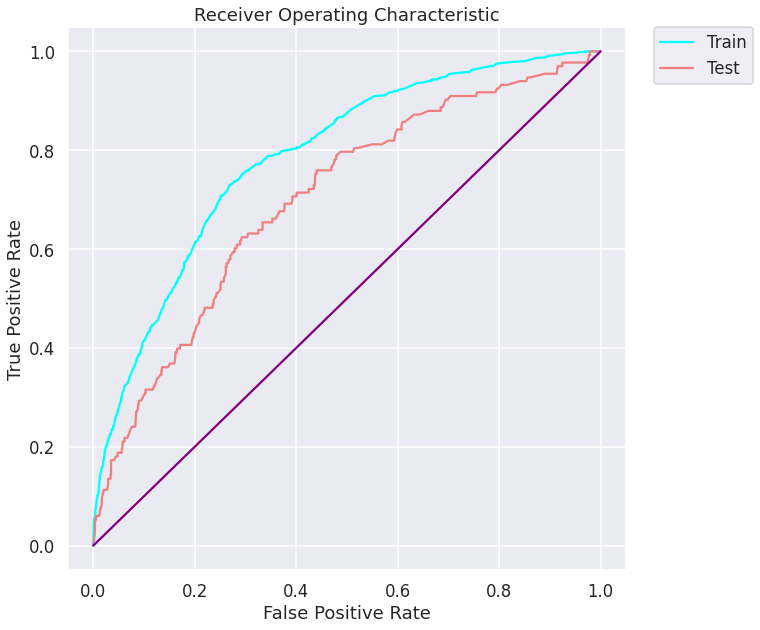

In [212]:
model_roc(y_train_os,
          y_test,
          xgb_train_probability,
          xgb_test_probability)

In [389]:
pickle.dump(xgb_best, open('/content/drive/MyDrive/flatiron/expected_goals/data_modeling/xgb.pkl',
                          'wb'))

# Compare Models

In [302]:
model_names = ['Logistic Regression',
                 'K Neighbors',
                 'Decision Tree',
                 'Random Forest',
                 'Gaussian Naive Bayes',
                 'Support Vector Machine',
                 'Gradient Boost',
                 'XG Boost']

model_comparison = pd.DataFrame(model_names, columns = ['Model'])

models = [lr,
          kn,
          dt,
          rf,
          gnb,
          svc,
          gb,
          xgb]

probabilities = [lr_test_probability,
                 kn_test_probability,
                 dt_test_probability,
                 rf_test_probability,
                 gnb_test_probability,
                 svc_test_probability,
                 gb_test_probability,
                 xgb_test_probability]

predictions = [lr_test_predict,
                 kn_test_predict,
                 dt_test_predict,
                 rf_test_predict,
                 gnb_test_predict,
                 svc_test_predict,
                 gb_test_predict,
                 xgb_test_predict]

recall_scores = []
for p in predictions:
    recall_scores.append(round((recall_score(y_test, p)), 2))

model_comparison['Recall'] = recall_scores

roc_scores = []
for p in probabilities:
    roc_scores.append(round((roc_auc_score(y_test, p[:,1])), 2))

model_comparison['ROC'] = roc_scores

accuracy_scores = []
for p in predictions:
    accuracy_scores.append(round((accuracy_score(y_test, p)), 2))

model_comparison['Accuracy'] = accuracy_scores

model_comparison.sort_values('Recall',
                             ascending = False,
                             inplace = True)

In [303]:
model_comparison

,Model,Recall,ROC,Accuracy
1,K Neighbors,0.73,0.70,0.59
3,Random Forest,0.73,0.70,0.58
6,Gradient Boost,0.68,0.70,0.64
7,XG Boost,0.68,0.70,0.64
2,Decision Tree,0.67,0.69,0.64
5,Support Vector Machine,0.65,0.69,0.67
0,Logistic Regression,0.64,0.71,0.65
4,Gaussian Naive Bayes,0.36,0.66,0.77


K Neighbors and Random Forest Models are performing similarly high in all three categories.

# Ensemble Models

## Bagging

An ensemble estimator which fits multiple base decision trees, on random subsets, then aggregates the individual predictions.

### Define Parameters

In [230]:
bc = BaggingClassifier(random_state = 13)

In [257]:
# Use Grid Search to find the best base decision tree

bc_params = {'base_estimator' : [dt_best, rf_best]}

model_grid(bc, bc_params)

{'base_estimator': DecisionTreeClassifier(ccp_alpha=0.0, class_weight='balanced', criterion='gini',
                        max_depth=5, max_features=None, max_leaf_nodes=None,
                        min_impurity_decrease=0.0, min_impurity_split=None,
                        min_samples_leaf=5, min_samples_split=10,
                        min_weight_fraction_leaf=0.0, presort='deprecated',
                        random_state=13, splitter='best')}

In [258]:
# Refine bc parameters for Grid Search

bc_best = BaggingClassifier(base_estimator = dt_best,
                            random_state = 13)

bc_params = {'n_estimators' : [10, 50, 100]}

# Use Grid Search to find the best parameters for bc

model_grid(bc, bc_params)

{'n_estimators': 10}

In [312]:
# Define best paramters for bc

bc_best = BaggingClassifier(base_estimator = dt_best,
                            n_estimators = 10,
                            random_state = 13)

### Fit Model

In [313]:
bc_best.fit(X_train_os,
            y_train_os)

BaggingClassifier(base_estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                        class_weight='balanced',
                                                        criterion='gini',
                                                        max_depth=5,
                                                        max_features=None,
                                                        max_leaf_nodes=None,
                                                        min_impurity_decrease=0.0,
                                                        min_impurity_split=None,
                                                        min_samples_leaf=5,
                                                        min_samples_split=10,
                                                        min_weight_fraction_leaf=0.0,
                                                        presort='deprecated',
                                                        random_state=13

In [314]:
bc_train_predict = bc_best.predict(X_train_os)
bc_train_probability = bc_best.predict_proba(X_train_os)

bc_test_predict = bc_best.predict(X_test)
bc_test_probability = bc_best.predict_proba(X_test)

### Results

In [315]:
print('Train Report')
model_report(y_train_os,
             bc_train_predict)

print('Test Report')
model_report(y_test,
             bc_test_predict)

Train Report


,0,1,accuracy,macro avg,weighted avg
precision,0.762579,0.718862,0.738736,0.740720,0.740720
recall,0.693333,0.784138,0.738736,0.738736,0.738736
f1-score,0.726309,0.750082,0.738736,0.738196,0.738196
support,4350.000000,4350.000000,0.738736,8700.000000,8700.000000


Test Report


,0,1,accuracy,macro avg,weighted avg
precision,0.938224,0.191441,0.666667,0.564833,0.856879
recall,0.670037,0.639098,0.666667,0.654567,0.666667
f1-score,0.781769,0.294627,0.666667,0.538198,0.728706
support,1088.000000,133.000000,0.666667,1221.000000,1221.000000


Train - Area Under the Curve: 0.81
Test - Area Under the Curve: 0.7


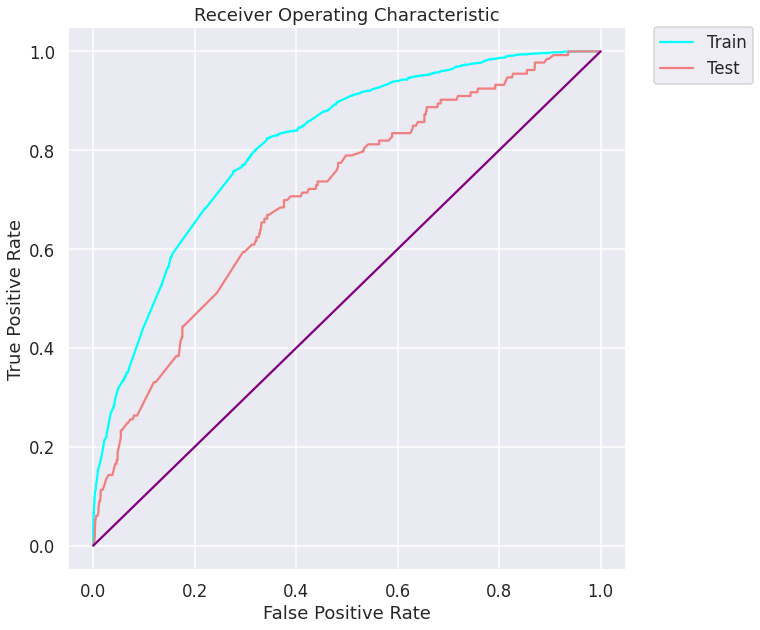

In [316]:
model_roc(y_train_os,
          y_test,
          bc_train_probability,
          bc_test_probability)

Bagging Classifier performed worse than the base, Decision Tree, and significantly less than the best models so far, K Neighbors and Random Forest.

In [390]:
pickle.dump(bc_best, open('/content/drive/MyDrive/flatiron/expected_goals/data_modeling/bc.pkl',
                          'wb'))

## Ada Boost

A boosting model, which connects a set of weak decision trees in series so that classifier attempts to improve the  misclassifications by the previous classifier.

### Define Parameters

In [255]:
# Define Model

ada = AdaBoostClassifier(random_state = 13)

In [345]:
# Refine ada parameters for Grid Search

ada_best = AdaBoostClassifier(base_estimator = dt_best,
                              random_state = 13)

ada_params = {'n_estimators' : [10, 50, 100],
             'learning_rate' : [0.5, 1]}

# Use Grid Search to find the best parameters for ada

model_grid(ada_best, ada_params)

{'learning_rate': 0.5, 'n_estimators': 50}

In [346]:
# Define best paramters for ada

ada_best = AdaBoostClassifier(base_estimator = dt_best,
                              n_estimators = 50,
                              learning_rate = 0.5,
                              random_state = 13)

### Fit Model - Decision Tree

In [347]:
ada_best.fit(X_train_os,
            y_train_os)

AdaBoostClassifier(algorithm='SAMME.R',
                   base_estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                         class_weight='balanced',
                                                         criterion='gini',
                                                         max_depth=5,
                                                         max_features=None,
                                                         max_leaf_nodes=None,
                                                         min_impurity_decrease=0.0,
                                                         min_impurity_split=None,
                                                         min_samples_leaf=5,
                                                         min_samples_split=10,
                                                         min_weight_fraction_leaf=0.0,
                                                         presort='deprecated',
                   

In [334]:
ada_train_predict = ada_best.predict(X_train_os)
ada_train_probability = ada_best.predict_proba(X_train_os)

ada_test_predict = ada_best.predict(X_test)
ada_test_probability = ada_best.predict_proba(X_test)

### Results

In [335]:
print('Train Report')
model_report(y_train_os,
             ada_train_predict)

print('Test Report')
model_report(y_test,
             ada_test_predict)

Train Report


,0,1,accuracy,macro avg,weighted avg
precision,0.836504,0.807346,0.821264,0.821925,0.821925
recall,0.798621,0.843908,0.821264,0.821264,0.821264
f1-score,0.817123,0.825222,0.821264,0.821173,0.821173
support,4350.000000,4350.000000,0.821264,8700.000000,8700.000000


Test Report


,0,1,accuracy,macro avg,weighted avg
precision,0.929609,0.214724,0.738739,0.572166,0.851739
recall,0.764706,0.526316,0.738739,0.645511,0.738739
f1-score,0.839133,0.305011,0.738739,0.572072,0.780952
support,1088.000000,133.000000,0.738739,1221.000000,1221.000000


### Adjustments

In [348]:
# Define best paramters for ada

ada_best = AdaBoostClassifier(base_estimator = dt_best,
                              n_estimators = 5,
                              learning_rate = 0.5,
                              random_state = 13)

### Refit Model

In [349]:
ada_best.fit(X_train_os,
            y_train_os)

AdaBoostClassifier(algorithm='SAMME.R',
                   base_estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                         class_weight='balanced',
                                                         criterion='gini',
                                                         max_depth=5,
                                                         max_features=None,
                                                         max_leaf_nodes=None,
                                                         min_impurity_decrease=0.0,
                                                         min_impurity_split=None,
                                                         min_samples_leaf=5,
                                                         min_samples_split=10,
                                                         min_weight_fraction_leaf=0.0,
                                                         presort='deprecated',
                   

In [350]:
ada_train_predict = ada_best.predict(X_train_os)
ada_train_probability = ada_best.predict_proba(X_train_os)

ada_test_predict = ada_best.predict(X_test)
ada_test_probability = ada_best.predict_proba(X_test)

### Results

In [351]:
print('Train Report')
model_report(y_train_os,
             ada_train_predict)

print('Test Report')
model_report(y_test,
             ada_test_predict)

Train Report


,0,1,accuracy,macro avg,weighted avg
precision,0.823087,0.757069,0.786322,0.790078,0.790078
recall,0.729425,0.843218,0.786322,0.786322,0.786322
f1-score,0.773431,0.797825,0.786322,0.785628,0.785628
support,4350.000000,4350.000000,0.786322,8700.000000,8700.000000


Test Report


,0,1,accuracy,macro avg,weighted avg
precision,0.934545,0.199495,0.696151,0.567020,0.854479
recall,0.708640,0.593985,0.696151,0.651312,0.696151
f1-score,0.806064,0.298677,0.696151,0.552370,0.750796
support,1088.000000,133.000000,0.696151,1221.000000,1221.000000


Train - Area Under the Curve: 0.87
Test - Area Under the Curve: 0.7


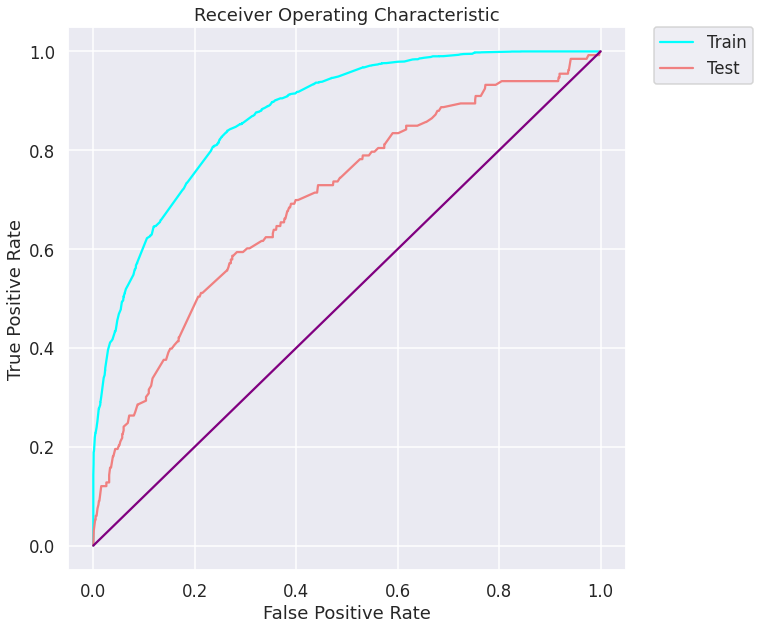

In [352]:
model_roc(y_train_os,
          y_test,
          ada_train_probability,
          ada_test_probability)

Ada Boost with Decision Tree as a base estimator is overfitting with any number of estimators greater than one, which indicates that Decision Tree performs better independently.

### Fit Model - Random Forest

In [353]:
# Define best paramters for ada

ada_best = AdaBoostClassifier(base_estimator = rf_best,
                              n_estimators = 50,
                              learning_rate = 0.5,
                              random_state = 13)

In [354]:
ada_best.fit(X_train_os,
            y_train_os)

AdaBoostClassifier(algorithm='SAMME.R',
                   base_estimator=RandomForestClassifier(bootstrap=True,
                                                         ccp_alpha=0.0,
                                                         class_weight='balanced',
                                                         criterion='gini',
                                                         max_depth=3,
                                                         max_features='auto',
                                                         max_leaf_nodes=None,
                                                         max_samples=None,
                                                         min_impurity_decrease=0.0,
                                                         min_impurity_split=None,
                                                         min_samples_leaf=5,
                                                         min_samples_split=2,
                                    

In [355]:
ada_train_predict = ada_best.predict(X_train_os)
ada_train_probability = ada_best.predict_proba(X_train_os)

ada_test_predict = ada_best.predict(X_test)
ada_test_probability = ada_best.predict_proba(X_test)

### Results

In [356]:
print('Train Report')
model_report(y_train_os,
             ada_train_predict)

print('Test Report')
model_report(y_test,
             ada_test_predict)

Train Report


,0,1,accuracy,macro avg,weighted avg
precision,0.836504,0.807346,0.821264,0.821925,0.821925
recall,0.798621,0.843908,0.821264,0.821264,0.821264
f1-score,0.817123,0.825222,0.821264,0.821173,0.821173
support,4350.000000,4350.000000,0.821264,8700.000000,8700.000000


Test Report


,0,1,accuracy,macro avg,weighted avg
precision,0.929609,0.214724,0.738739,0.572166,0.851739
recall,0.764706,0.526316,0.738739,0.645511,0.738739
f1-score,0.839133,0.305011,0.738739,0.572072,0.780952
support,1088.000000,133.000000,0.738739,1221.000000,1221.000000


### Adjustments

In [362]:
# Define best paramters for ada

ada_best = AdaBoostClassifier(base_estimator = rf_best,
                              n_estimators = 5,
                              learning_rate = 0.5,
                              random_state = 13)

### Refit Model

In [363]:
ada_best.fit(X_train_os,
            y_train_os)

AdaBoostClassifier(algorithm='SAMME.R',
                   base_estimator=RandomForestClassifier(bootstrap=True,
                                                         ccp_alpha=0.0,
                                                         class_weight='balanced',
                                                         criterion='gini',
                                                         max_depth=3,
                                                         max_features='auto',
                                                         max_leaf_nodes=None,
                                                         max_samples=None,
                                                         min_impurity_decrease=0.0,
                                                         min_impurity_split=None,
                                                         min_samples_leaf=5,
                                                         min_samples_split=2,
                                    

In [364]:
ada_train_predict = ada_best.predict(X_train_os)
ada_train_probability = ada_best.predict_proba(X_train_os)

ada_test_predict = ada_best.predict(X_test)
ada_test_probability = ada_best.predict_proba(X_test)

### Results

In [365]:
print('Train Report')
model_report(y_train_os,
             ada_train_predict)

print('Test Report')
model_report(y_test,
             ada_test_predict)

Train Report


,0,1,accuracy,macro avg,weighted avg
precision,0.766345,0.700081,0.728506,0.733213,0.733213
recall,0.657471,0.799540,0.728506,0.728506,0.728506
f1-score,0.707746,0.746512,0.728506,0.727129,0.727129
support,4350.000000,4350.000000,0.728506,8700.000000,8700.000000


Test Report


,0,1,accuracy,macro avg,weighted avg
precision,0.940443,0.180361,0.629812,0.560402,0.857650
recall,0.624081,0.676692,0.629812,0.650386,0.629812
f1-score,0.750276,0.284810,0.629812,0.517543,0.699574
support,1088.000000,133.000000,0.629812,1221.000000,1221.000000


Train - Area Under the Curve: 0.81
Test - Area Under the Curve: 0.7


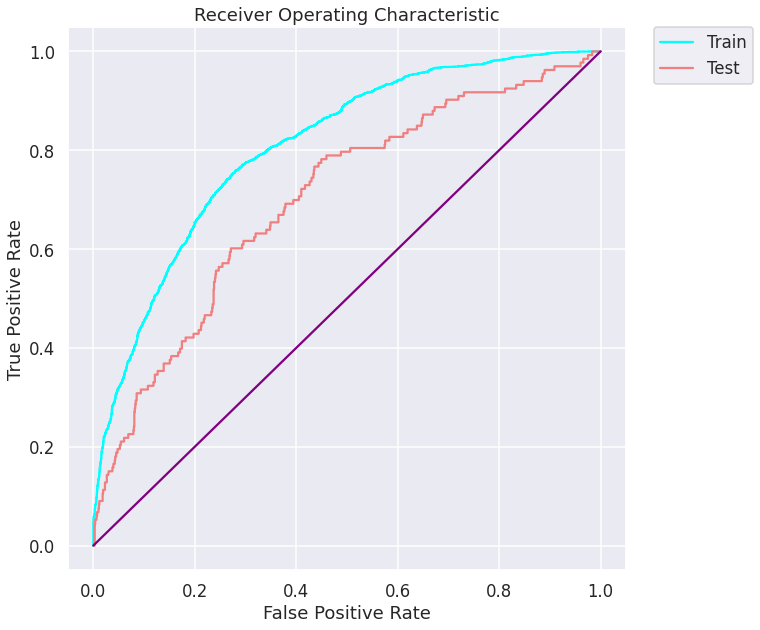

In [366]:
model_roc(y_train_os,
          y_test,
          ada_train_probability,
          ada_test_probability)

Ada Boost with Random Forest as a base estimator is not overfitting as much as with base estimator Decision Tree, however, it is still performing worse than Random Forest performed independently.

In [391]:
pickle.dump(ada_best, open('/content/drive/MyDrive/flatiron/expected_goals/data_modeling/ada.pkl',
                          'wb'))

## Voting Classifier

In [284]:
# Define which estimators to use

estimators = [('kn', kn_best),
              ('rf', rf_best),
              ('gb', gb_best),
              ('xgb', xgb_best)]

In [285]:
# Use a voting classifier to attempt to improve the predictive quality of 
# the modeling through averaging the individual models which have
# performed best so far
# Summing the predicted probabilities for classes, then predicting the
# class with the largest sum probability

vc = VotingClassifier(estimators,
                      voting = 'soft')

### Fit Model

In [286]:
vc.fit(X_train_os,
       y_train_os)

VotingClassifier(estimators=[('kn',
                              KNeighborsClassifier(algorithm='auto',
                                                   leaf_size=1,
                                                   metric='manhattan',
                                                   metric_params=None,
                                                   n_jobs=None, n_neighbors=300,
                                                   p=1, weights='uniform')),
                             ('rf',
                              RandomForestClassifier(bootstrap=True,
                                                     ccp_alpha=0.0,
                                                     class_weight='balanced',
                                                     criterion='gini',
                                                     max_depth=3,
                                                     max_features='auto',
                                                     max_leaf_nodes=N

In [287]:
vc_train_predict = vc.predict(X_train_os)
vc_train_probability = vc.predict_proba(X_train_os)

vc_test_predict = vc.predict(X_test)
vc_test_probability = vc.predict_proba(X_test)

### Results

In [288]:
print('Train Report')
model_report(y_train_os,
             vc_train_predict)

print('Test Report')
model_report(y_test,
             vc_test_predict)

Train Report


,0,1,accuracy,macro avg,weighted avg
precision,0.754765,0.677124,0.708966,0.715944,0.715944
recall,0.619080,0.798851,0.708966,0.708966,0.708966
f1-score,0.680222,0.732968,0.708966,0.706595,0.706595
support,4350.000000,4350.000000,0.708966,8700.000000,8700.000000


Test Report


,0,1,accuracy,macro avg,weighted avg
precision,0.944606,0.177570,0.608518,0.561088,0.861055
recall,0.595588,0.714286,0.608518,0.654937,0.608518
f1-score,0.730552,0.284431,0.608518,0.507492,0.681958
support,1088.000000,133.000000,0.608518,1221.000000,1221.000000


### Adjustments

In [289]:
# Reduce the number of estimators included within the ensemble

estimators = [('kn', kn_best),
              ('rf', rf_best)]

In [290]:
vc.fit(X_train_os,
             y_train_os)

VotingClassifier(estimators=[('kn',
                              KNeighborsClassifier(algorithm='auto',
                                                   leaf_size=1,
                                                   metric='manhattan',
                                                   metric_params=None,
                                                   n_jobs=None, n_neighbors=300,
                                                   p=1, weights='uniform')),
                             ('rf',
                              RandomForestClassifier(bootstrap=True,
                                                     ccp_alpha=0.0,
                                                     class_weight='balanced',
                                                     criterion='gini',
                                                     max_depth=3,
                                                     max_features='auto',
                                                     max_leaf_nodes=N

In [291]:
vc_train_predict = vc.predict(X_train_os)
vc_train_probability = vc.predict_proba(X_train_os)

vc_test_predict = vc.predict(X_test)
vc_test_probability = vc.predict_proba(X_test)

### Results

In [292]:
print('Train Report')
model_report(y_train_os,
             vc_train_predict)

print('Test Report')
model_report(y_test,
             vc_test_predict)

Train Report


,0,1,accuracy,macro avg,weighted avg
precision,0.754765,0.677124,0.708966,0.715944,0.715944
recall,0.619080,0.798851,0.708966,0.708966,0.708966
f1-score,0.680222,0.732968,0.708966,0.706595,0.706595
support,4350.000000,4350.000000,0.708966,8700.000000,8700.000000


Test Report


,0,1,accuracy,macro avg,weighted avg
precision,0.944606,0.177570,0.608518,0.561088,0.861055
recall,0.595588,0.714286,0.608518,0.654937,0.608518
f1-score,0.730552,0.284431,0.608518,0.507492,0.681958
support,1088.000000,133.000000,0.608518,1221.000000,1221.000000


Train - Area Under the Curve: 0.79
Test - Area Under the Curve: 0.7


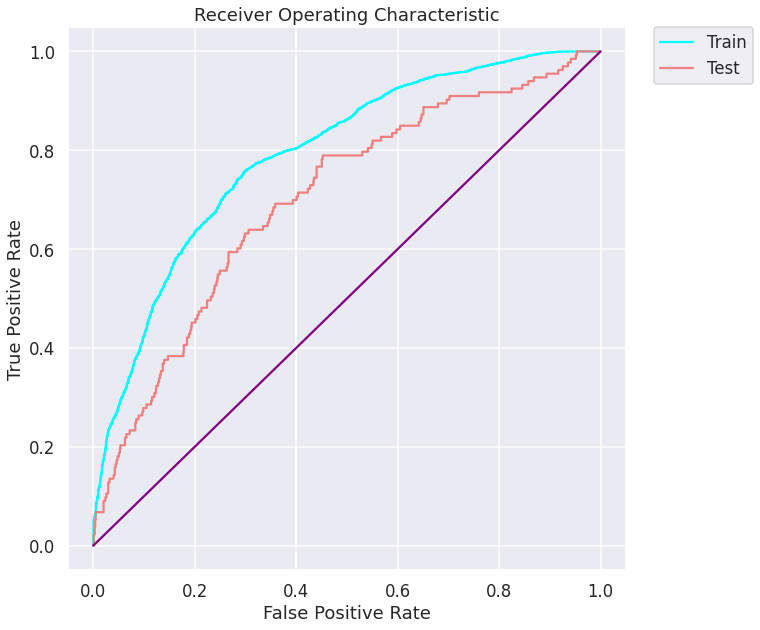

In [293]:
model_roc(y_train_os,
          y_test,
          vc_train_probability,
          vc_test_probability)

Voting Classifier performed better when only the top-2 classifiers were included, K Neighbors and Random Forest, rather than when the top-4, were included, with Gradient Boost and XG Boost.

Voting Classifier performed caparitively well v most individual models, however, still not as well as K Neighbors or Random Forest.

In [393]:
pickle.dump(vc, open('/content/drive/MyDrive/flatiron/expected_goals/data_modeling/vc.pkl',
                          'wb'))

# Compare Models

In [368]:
# Repeat model comparison, including ensemble models v top-4 individual models
  
model_names = ['K Neighbors',
                 'Random Forest',
                 'Gradient Boost',
                 'XG Boost',
                 'Bagging Classifier',
                 'Ada Boost',
                 'Voting Classifier']

model_comparison = pd.DataFrame(model_names, columns = ['Model'])

models = [kn,
          rf,
          gb,
          xgb,
          bc,
          ada,
          vc]

probabilities = [kn_test_probability,
                 rf_test_probability,
                 gb_test_probability,
                 xgb_test_probability,
                 bc_test_probability,
                 ada_test_probability,
                 vc_test_probability]

predictions = [kn_test_predict,
               rf_test_predict,
               gb_test_predict,
               xgb_test_predict,
               bc_test_predict,
               ada_test_predict,
               vc_test_predict]

recall_scores = []
for p in predictions:
    recall_scores.append(round((recall_score(y_test, p)), 2))

model_comparison['Recall'] = recall_scores

roc_scores = []
for p in probabilities:
    roc_scores.append(round((roc_auc_score(y_test, p[:,1])), 2))

model_comparison['ROC'] = roc_scores

accuracy_scores = []
for p in predictions:
    accuracy_scores.append(round((accuracy_score(y_test, p)), 2))

model_comparison['Accuracy'] = accuracy_scores

model_comparison.sort_values('Recall',
                             ascending = False,
                             inplace = True)

In [369]:
print('Sorted by Recall')
model_comparison

Sorted by Recall


,Model,Recall,ROC,Accuracy
0,K Neighbors,0.73,0.7,0.59
1,Random Forest,0.73,0.7,0.58
6,Voting Classifier,0.71,0.7,0.61
2,Gradient Boost,0.68,0.7,0.64
3,XG Boost,0.68,0.7,0.64
5,Ada Boost,0.68,0.7,0.63
4,Bagging Classifier,0.64,0.7,0.67


# Feature Selection

## Feature Importance

In [224]:
# Visualize Feature Importance

def model_fi(model):
    model.fit(X_train_os, y_train_os)
    predictions = model.predict(X_test)
    
    fi = (pd.DataFrame(model.feature_importances_,
                       index = X_test.columns, 
          columns = ['importance']).sort_values('importance',
                                                ascending = False))
    fig, ax = plt.subplots(figsize = (10, 20))
    sns.barplot(x = 'importance', y = fi.index, 
                data = fi, color = 'purple')
    ax.set_title('Feature Importance')
    plt.show()

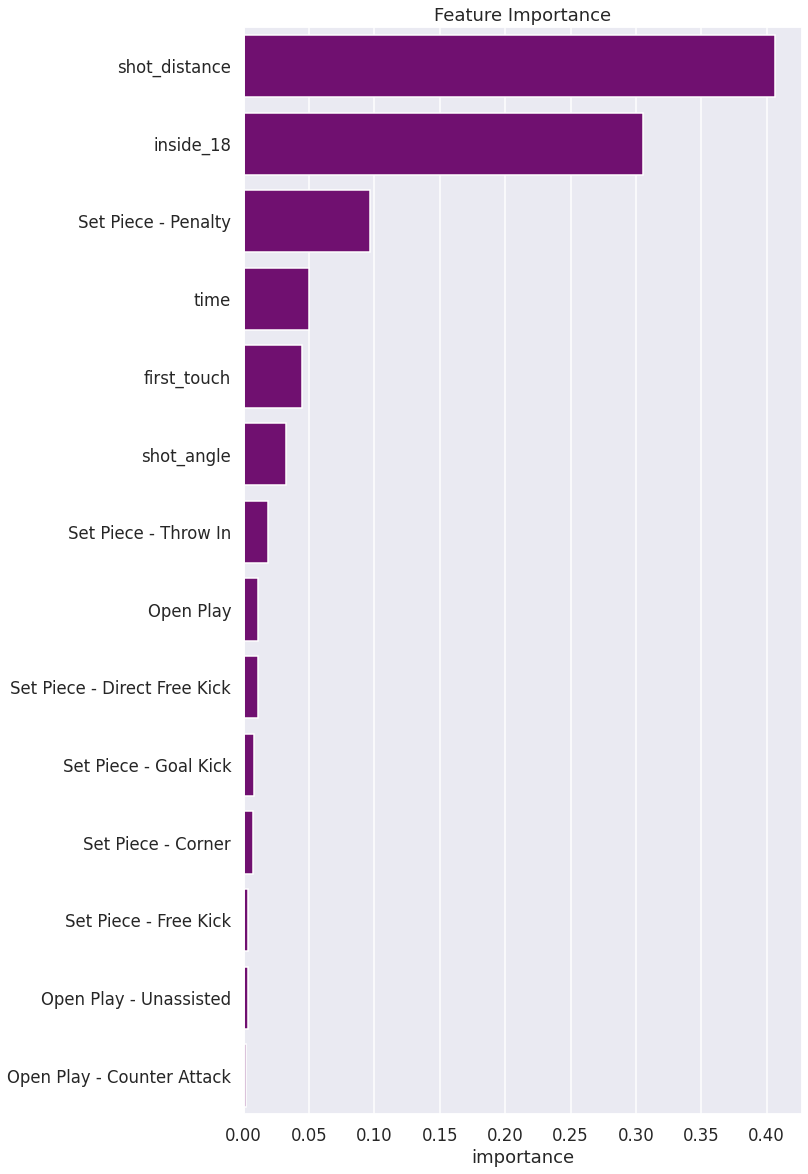

In [301]:
model_fi(rf_best)

## K Neighbors

### Recursive Feature Elimination

In [419]:
# Use RFE to reduce the number of features

rfe = RFE(estimator = kn_best,
          n_features_to_select = 5)

### Refit Model

In [420]:
kn_best.fit(X_train_rfe,
            y_train_os)

KNeighborsClassifier(algorithm='auto', leaf_size=1, metric='manhattan',
                     metric_params=None, n_jobs=None, n_neighbors=300, p=1,
                     weights='uniform')

In [421]:
kn_train_predict = kn_best.predict(X_train_rfe)
kn_train_probability = kn_best.predict_proba(X_train_rfe)

kn_test_predict = kn_best.predict(X_test_rfe)
kn_test_probability = kn_best.predict_proba(X_test_rfe)

### Results

In [422]:
print('Train Report')
model_report(y_train_os,
             kn_train_predict)

print('Test Report')
model_report(y_test,
             kn_test_predict)

Train Report


,0,1,accuracy,macro avg,weighted avg
precision,0.760177,0.666102,0.702759,0.713139,0.713139
recall,0.592414,0.813103,0.702759,0.702759,0.702759
f1-score,0.665891,0.732298,0.702759,0.699095,0.699095
support,4350.000000,4350.000000,0.702759,8700.000000,8700.000000


Test Report


,0,1,accuracy,macro avg,weighted avg
precision,0.945372,0.172598,0.589681,0.558985,0.861196
recall,0.572610,0.729323,0.589681,0.650967,0.589681
f1-score,0.713223,0.279137,0.589681,0.496180,0.665939
support,1088.000000,133.000000,0.589681,1221.000000,1221.000000


Train - Area Under the Curve: 0.77
Test - Area Under the Curve: 0.69


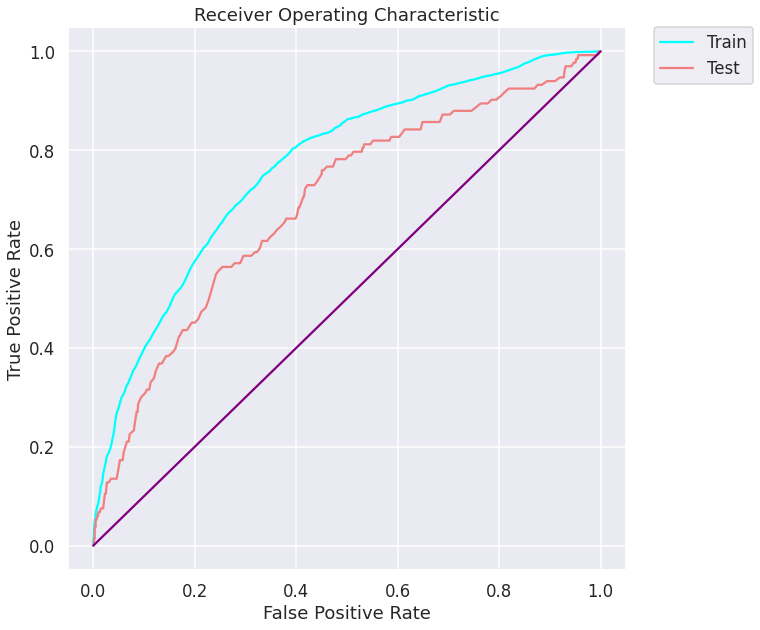

In [423]:
model_roc(y_train_os,
          y_test,
          kn_train_probability,
          kn_test_probability)

RFE had no apparent impact on recall and a negative impact on ROC

## Random Forest

### Recursive Feature Elimination

In [413]:
# Use RFE to reduce the number of features

rfe = RFE(estimator = rf_best,
          n_features_to_select = 5)

In [414]:
X_train_rfe = rfe.fit_transform(X_train_os, y_train_os)
X_test_rfe = rfe.transform(X_test)

### Refit Model

In [415]:
rf_best.fit(X_train_rfe,
            y_train_os)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight='balanced',
                       criterion='gini', max_depth=3, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=300,
                       n_jobs=None, oob_score=False, random_state=13, verbose=0,
                       warm_start=False)

In [416]:
rf_train_predict = rf_best.predict(X_train_rfe)
rf_train_probability = rf_best.predict_proba(X_train_rfe)

rf_test_predict = rf_best.predict(X_test_rfe)
rf_test_probability = rf_best.predict_proba(X_test_rfe)

### Results

In [417]:
print('Train Report')
model_report(y_train_os,
             rf_train_predict)

print('Test Report')
model_report(y_test,
             rf_test_predict)

Train Report


,0,1,accuracy,macro avg,weighted avg
precision,0.749113,0.658578,0.693793,0.703846,0.703846
recall,0.582759,0.804828,0.693793,0.693793,0.693793
f1-score,0.655547,0.724395,0.693793,0.689971,0.689971
support,4350.000000,4350.000000,0.693793,8700.000000,8700.000000


Test Report


,0,1,accuracy,macro avg,weighted avg
precision,0.944186,0.168403,0.578215,0.556294,0.859682
recall,0.559743,0.729323,0.578215,0.644533,0.578215
f1-score,0.702827,0.273625,0.578215,0.488226,0.656076
support,1088.000000,133.000000,0.578215,1221.000000,1221.000000


Train - Area Under the Curve: 0.77
Test - Area Under the Curve: 0.69


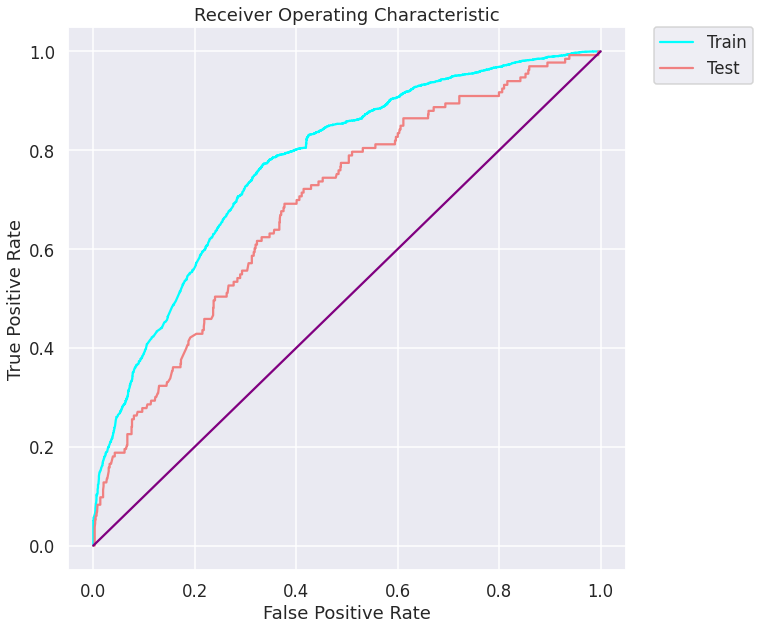

In [418]:
model_roc(y_train_os,
          y_test,
          rf_train_probability,
          rf_test_probability)

RFE had no apparent impact on recall and a negative impact on ROC

## Voting Classifier

### Recursive Feature Elimination

In [424]:
# Use RFE to reduce the number of features

rfe = RFE(estimator = vc,
          n_features_to_select = 5)

### Refit Model

In [425]:
vc.fit(X_train_rfe,
       y_train_os)

VotingClassifier(estimators=[('kn',
                              KNeighborsClassifier(algorithm='auto',
                                                   leaf_size=1,
                                                   metric='manhattan',
                                                   metric_params=None,
                                                   n_jobs=None, n_neighbors=300,
                                                   p=1, weights='uniform')),
                             ('rf',
                              RandomForestClassifier(bootstrap=True,
                                                     ccp_alpha=0.0,
                                                     class_weight='balanced',
                                                     criterion='gini',
                                                     max_depth=3,
                                                     max_features='auto',
                                                     max_leaf_nodes=N

In [426]:
vc_train_predict = vc.predict(X_train_rfe)
vc_train_probability = vc.predict_proba(X_train_rfe)

vc_test_predict = vc.predict(X_test_rfe)
vc_test_probability = vc.predict_proba(X_test_rfe)

### Results

In [427]:
print('Train Report')
model_report(y_train_os,
             vc_train_predict)

print('Test Report')
model_report(y_test,
             vc_test_predict)

Train Report


,0,1,accuracy,macro avg,weighted avg
precision,0.754043,0.673043,0.705862,0.713543,0.713543
recall,0.611034,0.800690,0.705862,0.705862,0.705862
f1-score,0.675048,0.731339,0.705862,0.703193,0.703193
support,4350.000000,4350.000000,0.705862,8700.000000,8700.000000


Test Report


,0,1,accuracy,macro avg,weighted avg
precision,0.942478,0.173112,0.600328,0.557795,0.858673
recall,0.587316,0.706767,0.600328,0.647042,0.600328
f1-score,0.723669,0.278107,0.600328,0.500888,0.675135
support,1088.000000,133.000000,0.600328,1221.000000,1221.000000


Train - Area Under the Curve: 0.78
Test - Area Under the Curve: 0.7


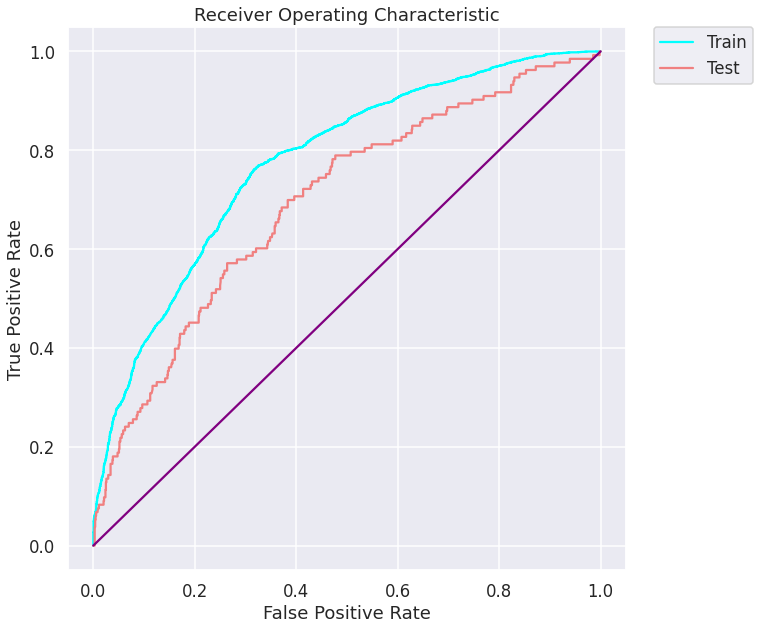

In [428]:
model_roc(y_train_os,
          y_test,
          vc_train_probability,
          vc_test_probability)

RFE had no apparent impact on recall and a negative impact on ROC

# Test

In [443]:
X_train_fs = X_train_os.drop(['inside_18', 'Set Piece - Penalty'],
                          axis = 1)
X_test_fs = X_test.drop(['inside_18', 'Set Piece - Penalty'],
                        axis = 1)

In [449]:
rf_best.fit(X_train_fs,
            y_train_os)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight='balanced',
                       criterion='gini', max_depth=3, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=300,
                       n_jobs=None, oob_score=False, random_state=13, verbose=0,
                       warm_start=False)

In [450]:
rf_train_predict = rf_best.predict(X_train_fs)
rf_train_probability = rf_best.predict_proba(X_train_fs)

rf_test_predict = rf_best.predict(X_test_fs)
rf_test_probability = rf_best.predict_proba(X_test_fs)

In [451]:
print('Train Report')
model_report(y_train_os,
             rf_train_predict)

print('Test Report')
model_report(y_test,
             rf_test_predict)

Train Report


,0,1,accuracy,macro avg,weighted avg
precision,0.754235,0.669734,0.703563,0.711984,0.711984
recall,0.603908,0.803218,0.703563,0.703563,0.703563
f1-score,0.670752,0.730428,0.703563,0.700590,0.700590
support,4350.000000,4350.000000,0.703563,8700.000000,8700.000000


Test Report


,0,1,accuracy,macro avg,weighted avg
precision,0.944940,0.174863,0.59869,0.559902,0.861058
recall,0.583640,0.721805,0.59869,0.652722,0.598690
f1-score,0.721591,0.281525,0.59869,0.501558,0.673656
support,1088.000000,133.000000,0.59869,1221.000000,1221.000000


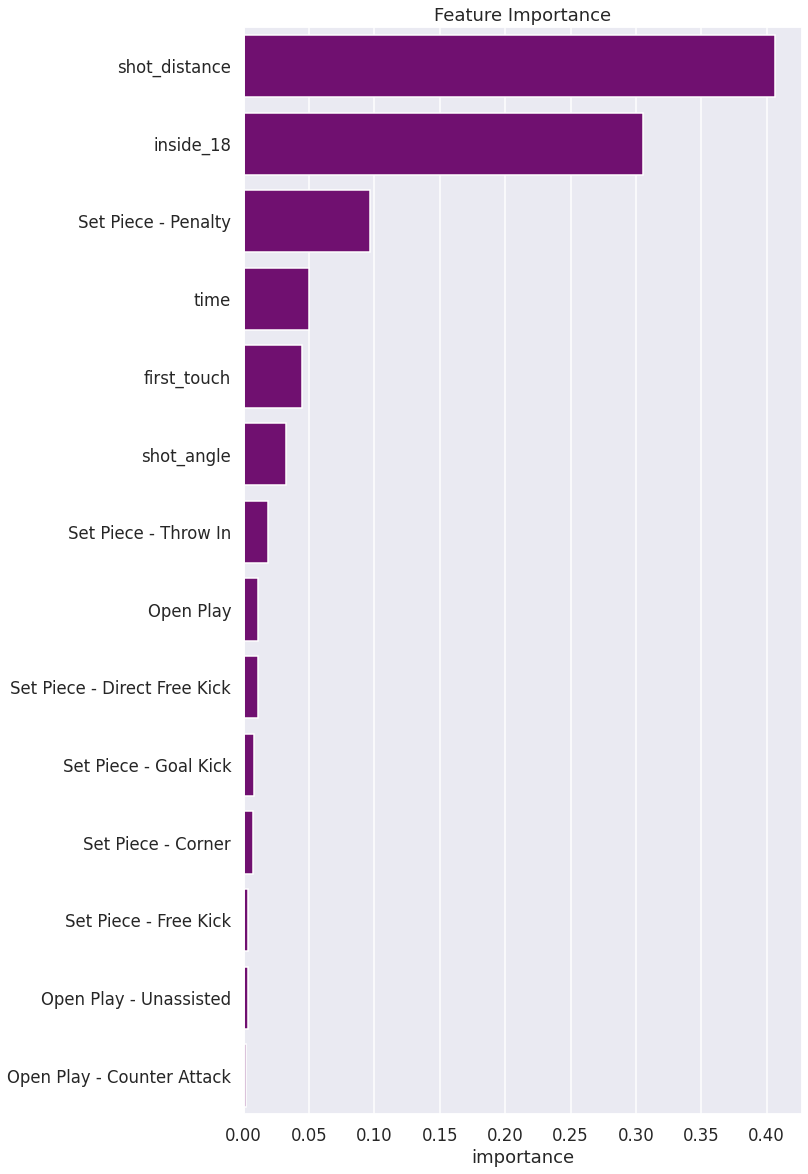

In [452]:
model_fi(rf_best)

Continued in [expected_goals_results_notebook](https://github.com/wswager/expected_goals/blob/main/data_modeling/expected_goals_data_modeling_notebook.ipynb)